<a href="https://colab.research.google.com/github/eladcohen333/computer_vision/blob/main/High_pass_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib
import urllib.request

Download locally and load



In [6]:
image_url = 'https://www.juventus.com/images/image/private/t_album/dev/rtqlrredv6wojzhu8wyx.jpg'

image_path = 'image.jpg'
urllib.request.urlretrieve(image_url, image_path)


('image.jpg', <http.client.HTTPMessage at 0x7f56da238d50>)

Plot image



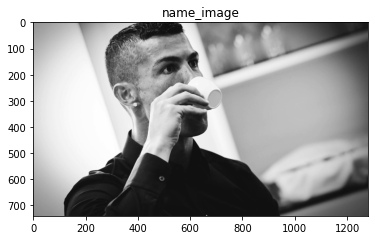

(740, 1280)

In [7]:
def plot_image(image,name_image):
    image = np.clip(image,0,255)
    image = image.astype(np.uint8)
    plt.imshow(image,cmap='gray')
    plt.title(name_image)
    plt.show()
image = plt.imread(image_path).astype(float)
# image = image[:,:,0]

plot_image(image,"name_image")
image.shape

Function for high pass filter - images in Frequency Domain
 

In [8]:
def high_filter(image):

  fft_image = np.fft.fft2(image.copy()) #fft
  fft_image_shift = np.fft.fftshift(fft_image) #fft shift
  
  #high filter 
  rows, cols = image.shape
  mid_row, mid_col = int(rows/2), int(cols/2)
  fft_image_shift[mid_row-50:mid_row+50, mid_col-50:mid_col+50] = 0

  fft_image_filterd = np.fft.ifftshift(fft_image_shift)
  ff_image = np.fft.ifft2(fft_image_filterd) #ifft 
  ff_image = np.abs(ff_image)

  return ff_image

  


Results

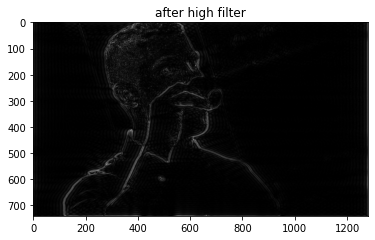

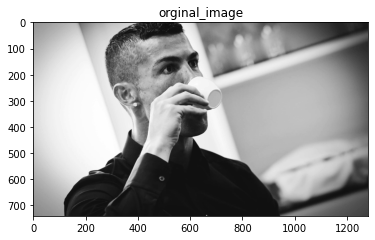

In [9]:
new_image = high_filter(image)
plot_image(new_image,"after high filter")
plot_image(image,"orginal_image")
